In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Beispiel 1: Einband-Modell (D=1)

In [3]:
def OneBand_RealSpace(L):
    H = np.zeros([L,L])
    indx = np.arange(0,L,step=1)
    H[indx[0:L-1],indx[0:L-1]+1] = 1.0
    H[0,L-1] = 1.0
    H = H + H.T
    eps, evecs = la.eigh(H)
    return eps
    
def OneBand_RecipSpace(L):
    ks = np.pi * (-1 + 2*np.arange(0,L,step=1)/L)
    epsk = 2 * np.cos(ks)
    return ks, epsk

### Hier überprüfen wir die Eigenwerte des Realraum-Hamiltonians $H_{R R^\prime}$ und $H(k)$

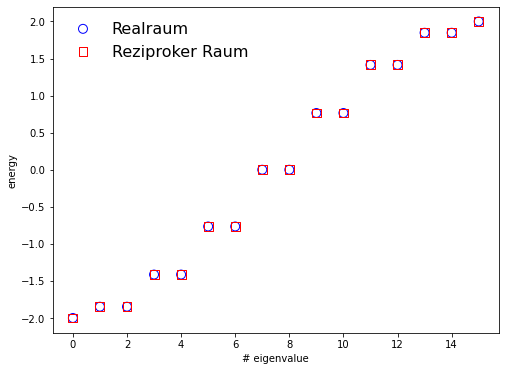

In [14]:
L = 16

eps_r = OneBand_RealSpace(L)
ks, eps_k = OneBand_RecipSpace(L)

indx_eig = np.argsort(eps_k)

fig, ax = plt.subplots(figsize=(8,6))

indx = np.arange(0,L,step=1)
ax.scatter(indx, eps_r, marker='o', facecolor='none', edgecolor='blue', s=80, label='Realraum')
ax.scatter(indx, eps_k[indx_eig], marker='s', facecolor='none', edgecolor='red', s=80, label='Reziproker Raum')
ax.set_xlabel("# eigenvalue")
ax.set_ylabel("energy")
ax.legend(loc='best', frameon=False, fontsize=16)

plt.show()

### Bandstruktur

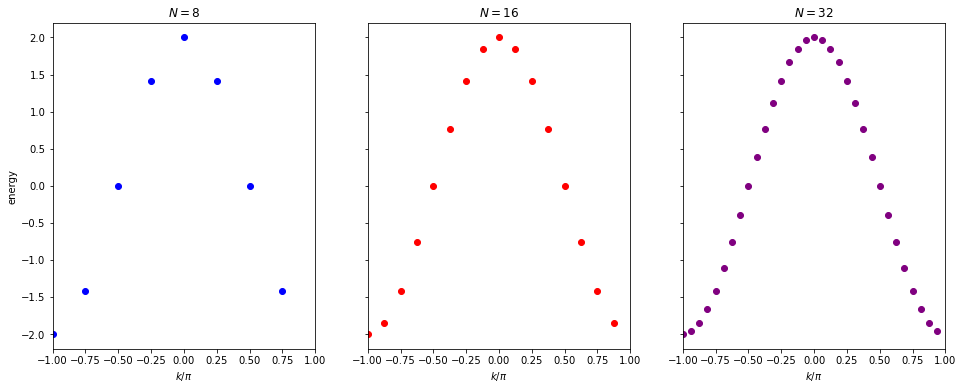

In [5]:
ks_8, epsk_8 = OneBand_RecipSpace(8)
ks_16, epsk_16 = OneBand_RecipSpace(16)
ks_32, epsk_32 = OneBand_RecipSpace(32)

fig, ax = plt.subplots(1,3,sharey=True,figsize=(16,6))

ax[0].scatter(ks_8 / np.pi, epsk_8, c='blue')
ax[1].scatter(ks_16 / np.pi, epsk_16, c='red')
ax[2].scatter(ks_32 / np.pi, epsk_32, c='purple')

ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[2].set_xlim(-1,1)
ax[0].set_xlabel(r"$k / \pi$")
ax[1].set_xlabel(r"$k / \pi$")
ax[2].set_xlabel(r"$k / \pi$")
ax[0].set_ylabel("energy")
ax[0].set_title(r"$N = 8$")
ax[1].set_title(r"$N = 16$")
ax[2].set_title(r"$N = 32$")
plt.show()

# Beispiel 2: Zweiband-Modell (D=1)

In [7]:
def TwoBand_RecipSpace(eps0,dlt,L):
    ks = np.pi * (-1 + 2*np.arange(0,L,step=1)/L)
    epsk = np.zeros([L,2])
    for i, k in enumerate(ks):
        Hk = np.array([[eps0 + dlt, 1.0 + np.exp(-1j*k)], [1.0 + np.exp(1j*k), eps0 - dlt]])
        epsk[i,:] = la.eigh(Hk, eigvals_only=True)
        
    return ks, epsk

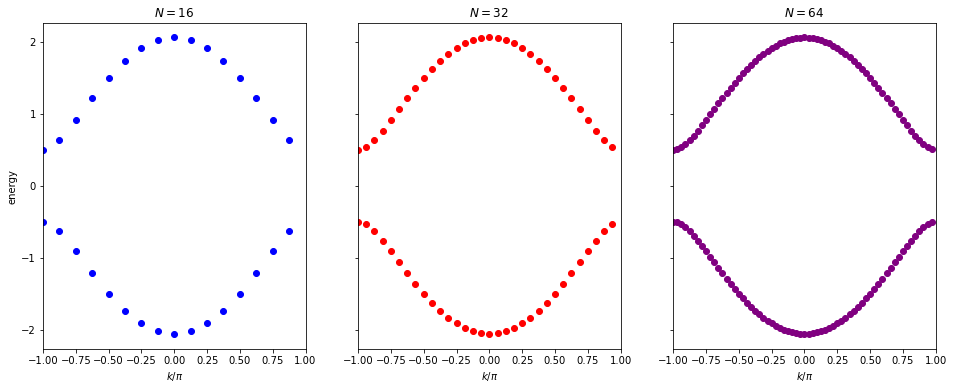

In [8]:
eps0, dlt = 0.0, 0.5

ks_16, epsk_16 = TwoBand_RecipSpace(eps0,dlt,16)
ks_32, epsk_32 = TwoBand_RecipSpace(eps0,dlt,32)
ks_64, epsk_64 = TwoBand_RecipSpace(eps0,dlt,64)

fig, ax = plt.subplots(1,3,sharey=True,figsize=(16,6))

ax[0].scatter(ks_16 / np.pi, epsk_16[:,0], c='blue')
ax[0].scatter(ks_16 / np.pi, epsk_16[:,1], c='blue')
ax[1].scatter(ks_32 / np.pi, epsk_32[:,0], c='red')
ax[1].scatter(ks_32 / np.pi, epsk_32[:,1], c='red')
ax[2].scatter(ks_64 / np.pi, epsk_64[:,0], c='purple')
ax[2].scatter(ks_64 / np.pi, epsk_64[:,1], c='purple')

ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[2].set_xlim(-1,1)
ax[0].set_xlabel(r"$k / \pi$")
ax[1].set_xlabel(r"$k / \pi$")
ax[2].set_xlabel(r"$k / \pi$")
ax[0].set_ylabel("energy")
ax[0].set_title(r"$N = 16$")
ax[1].set_title(r"$N = 32$")
ax[2].set_title(r"$N = 64$")
plt.show()

# Beispiel 3: Graphen (D=2)

### Gitter, Einheitszelle und reziprokes Gitter

In [9]:
def GetRecip2d(a1,a2):
    M = np.array([a1,a2])
    b1 = 2*np.pi*la.solve(M,np.array([1.0, 0.0]))
    b2 = 2*np.pi*la.solve(M,np.array([0.0, 1.0]))
    return b1, b2

def PlotLattice(ax,a1,a2,nmax=3):
    rvec_1 = np.array([0.0, 1. / np.sqrt(3.)])
    rvec_2 = -a2 + rvec_1
    rvec_3 = -a1 -a2 + rvec_1
    
    nn = np.arange(-nmax, nmax+1, step=1)
    nn_x,nn_y = np.meshgrid(nn, nn)
    nn_x = np.reshape(nn_x,[(2*nmax+1)**2])
    nn_y = np.reshape(nn_y,[(2*nmax+1)**2])
    
    lat_A = nn_x[None,:] * a1[:,None] + nn_y[None,:] * a2[:,None]
    lat_B = lat_A + rvec_1[:,None]  
    
    ax.scatter(lat_A[0,:], lat_A[1,:], facecolor='purple', edgecolor='k', s=80, zorder=8)
    ax.scatter(lat_B[0,:], lat_B[1,:], facecolor='green', edgecolor='k', s=80, zorder=8)
    
    for i in range(lat_A.shape[1]):
        ax.plot([lat_A[0,i],lat_A[0,i] + rvec_1[0]], [lat_A[1,i],lat_A[1,i] + rvec_1[1]], c='k')
        ax.plot([lat_A[0,i],lat_A[0,i] + rvec_2[0]], [lat_A[1,i],lat_A[1,i] + rvec_2[1]], c='k')
        ax.plot([lat_A[0,i],lat_A[0,i] + rvec_3[0]], [lat_A[1,i],lat_A[1,i] + rvec_3[1]], c='k')
      
    for i1 in range(-nmax,nmax+1):
        for i2 in range(-nmax,nmax+1):
            p1 = i1*a1 + i2*a2
            p2 = (i1 + 1)*a1 + i2*a2
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], c='red',ls='--',zorder=9)
            p2 = i1*a1 + (i2 + 1)*a2
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], c='red',ls='--',zorder=9)
            
def PlotRecipLattice(ax,b1,b2,nmax=1):
    for i1 in range(-nmax,nmax+1):
        for i2 in range(-nmax,nmax+1):
            p1 = i1*b1 + i2*b2
            p2 = (i1 + 1)*b1 + i2*b2
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], c='purple',ls='--',zorder=9)
            p2 = i1*b1 + (i2 + 1)*b2
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], c='purple',ls='--',zorder=9)    
            
            K1 = i1*b1 + i2*b2 + 1./3. * b1 + 1./3. * b2
            K2 = i1*b1 + i2*b2 - 1./3. * b1 - 1./3. * b2
            
            ax.scatter([K1[0]], [K1[1]], c='blue', s=80)
            ax.scatter([K2[0]], [K2[1]], c='orange', s=80)

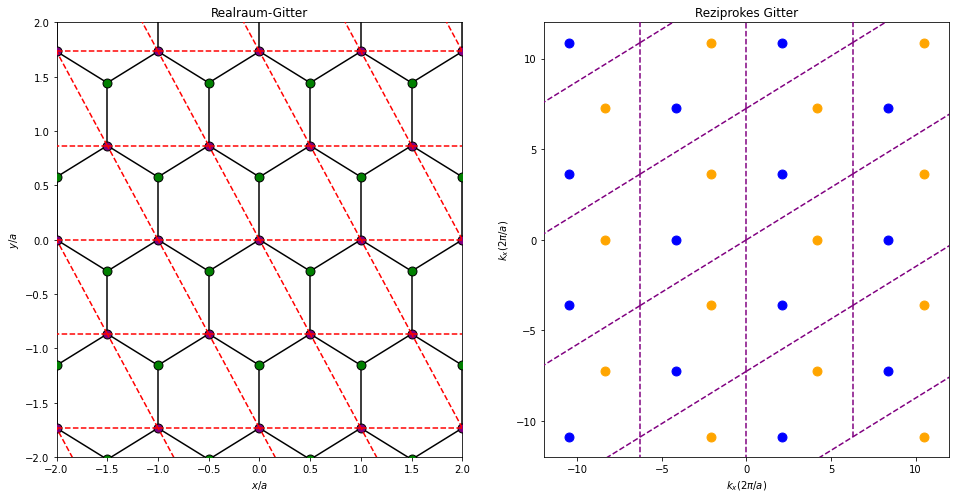

In [11]:
a1 = np.array([1.0, 0.0])
a2 = np.array([-0.5, 0.5*np.sqrt(3.0)])

b1, b2 = GetRecip2d(a1,a2)

fig, ax = plt.subplots(1,2,figsize=(16,8))

PlotLattice(ax[0],a1,a2)
ax[0].set_xlim(-2,2)
ax[0].set_ylim(-2,2)
ax[0].set_xlabel(r"$x / a$")
ax[0].set_ylabel(r"$y / a$")

PlotRecipLattice(ax[1],b1,b2,nmax=2)
ax[1].set_xlim(-12,12)
ax[1].set_ylim(-12,12)
ax[1].set_xlabel(r"$k_x (2\pi/a) $")
ax[1].set_ylabel(r"$k_x (2\pi/a)$")

ax[0].set_title("Realraum-Gitter")
ax[1].set_title("Reziprokes Gitter")
plt.show()

### Bandstruktur

In [12]:
def GetGraBands(kpts):
    gk = 1.0 + np.exp(-2j*np.pi*kpts[:,0]) + np.exp(-2j*np.pi*(kpts[:,0] + kpts[:,1]))
    eps_l = -np.abs(gk)
    eps_u = np.abs(gk)
    return eps_l, eps_u

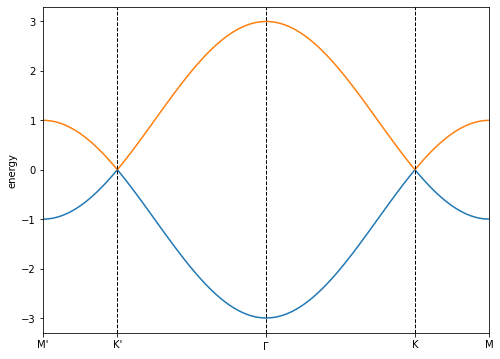

In [13]:
nk = 121
xk = np.linspace(-0.5, 0.5, nk)
kpts = np.zeros([nk, 2])
kpts[:,0] = xk; kpts[:,1] = xk

eps_l, eps_u = GetGraBands(kpts)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(xk, eps_l)
ax.plot(xk, eps_u)
ax.axvline(x=-1./3., c='k', lw=1, ls='--')
ax.axvline(x=0.0, c='k', lw=1, ls='--')
ax.axvline(x=1./3., c='k', lw=1, ls='--')
ax.set_xlim(-0.5, 0.5)
ax.set_xticks([-0.5, -1./3., 0.0, 1./3., 0.5])
ax.set_xticklabels(["M'","K'", r"$\Gamma$", "K", "M"])
ax.set_ylabel("energy")
plt.show()